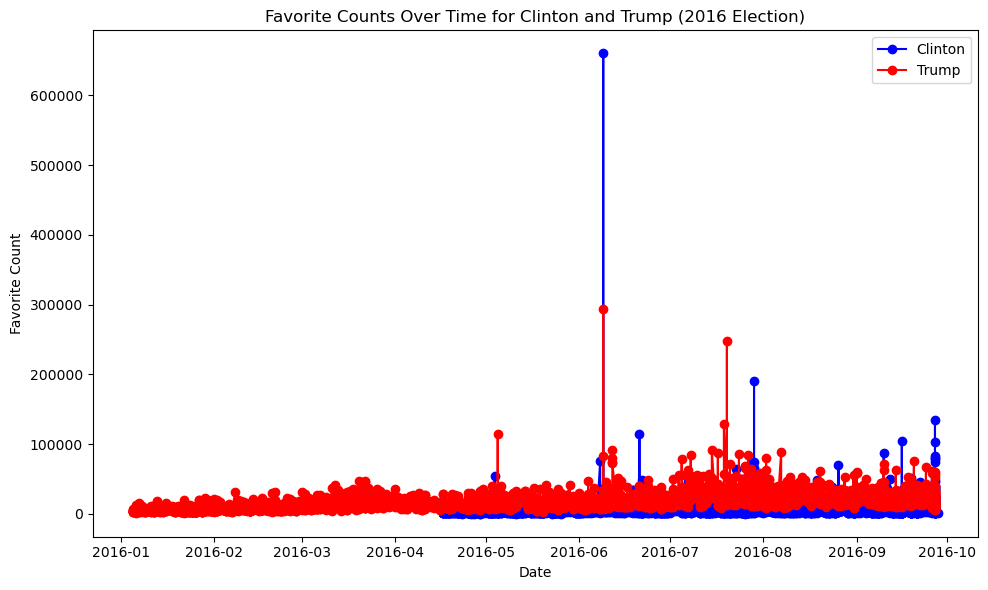

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取你提供的清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取特朗普和希拉里的数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 创建一个新的绘图窗口
plt.figure(figsize=(10, 6))

# 绘制希拉里的点赞量变化折线图
plt.plot(clinton_data['date'], clinton_data['favorite_count'], label="Clinton", color='blue', linestyle='-', marker='o')

# 绘制特朗普的点赞量变化折线图
plt.plot(trump_data['date'], trump_data['favorite_count'], label="Trump", color='red', linestyle='-', marker='o')

# 添加标题和标签
plt.title('Favorite Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Favorite Count')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

目前的可视化因为数据点过于密集，确实难以读出趋势。为了更好地展示点赞量随时间的趋势，我将数据进行聚合，比如按周或按月汇总点赞量，以减少数据的密集度，并让折线图更清晰地展示出变化趋势。

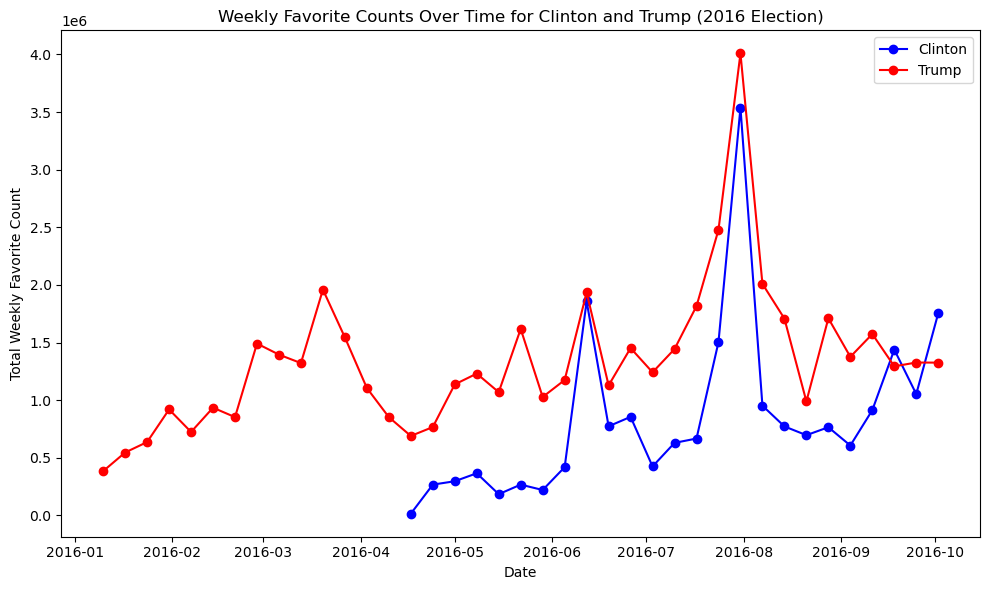

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取特朗普和希拉里的数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按周聚合点赞量
clinton_weekly = clinton_data.resample('W', on='date').sum(numeric_only=True)['favorite_count']
trump_weekly = trump_data.resample('W', on='date').sum(numeric_only=True)['favorite_count']

# 创建一个新的绘图窗口
plt.figure(figsize=(10, 6))

# 绘制希拉里的周点赞量变化折线图
plt.plot(clinton_weekly.index, clinton_weekly, label="Clinton", color='blue', marker='o', linestyle='-')

# 绘制特朗普的周点赞量变化折线图
plt.plot(trump_weekly.index, trump_weekly, label="Trump", color='red', marker='o', linestyle='-')

# 添加标题和标签
plt.title('Weekly Favorite Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Favorite Count')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

把时间调成月度区间，可读性上升，但丢失了很多信息，例如月度之内的事件没有得到好的可视化。

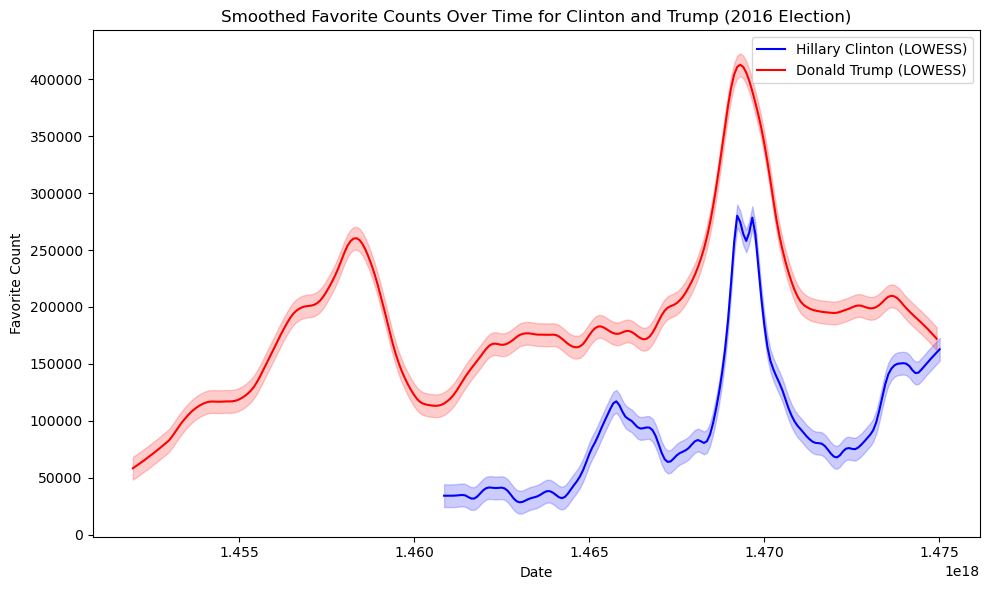

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 读取数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总点赞量
clinton_daily = clinton_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']
trump_daily = trump_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']

# 平滑点赞量（LOWESS）
clinton_smoothed = sm.nonparametric.lowess(clinton_daily, clinton_daily.index, frac=0.1)
trump_smoothed = sm.nonparametric.lowess(trump_daily, trump_daily.index, frac=0.1)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的趋势线
plt.plot(clinton_smoothed[:, 0], clinton_smoothed[:, 1], label="Hillary Clinton (LOWESS)", color='blue')

# 绘制特朗普的趋势线
plt.plot(trump_smoothed[:, 0], trump_smoothed[:, 1], label="Donald Trump (LOWESS)", color='red')

# 置信区间（可以根据实际数据计算标准差，暂时用一个假设的置信区间范围）
plt.fill_between(clinton_smoothed[:, 0], clinton_smoothed[:, 1] - 10000, clinton_smoothed[:, 1] + 10000, color='blue', alpha=0.2)
plt.fill_between(trump_smoothed[:, 0], trump_smoothed[:, 1] - 10000, trump_smoothed[:, 1] + 10000, color='red', alpha=0.2)

# 添加标题和标签
plt.title('Smoothed Favorite Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Favorite Count')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

	1.	LOWESS：使用 statsmodels 中的 lowess 来平滑时间序列数据。frac=0.1 指定了平滑参数，可以根据需要调整。
	2.	置信区间：我暂时用的是一个假设的区间（上下偏差10000），你可以根据数据的标准差来调整这个范围，以更准确地展示置信区间。
	3.	可视化风格：图表中使用不同的颜色区分希拉里和特朗普，并为各自添加置信区间的阴影。

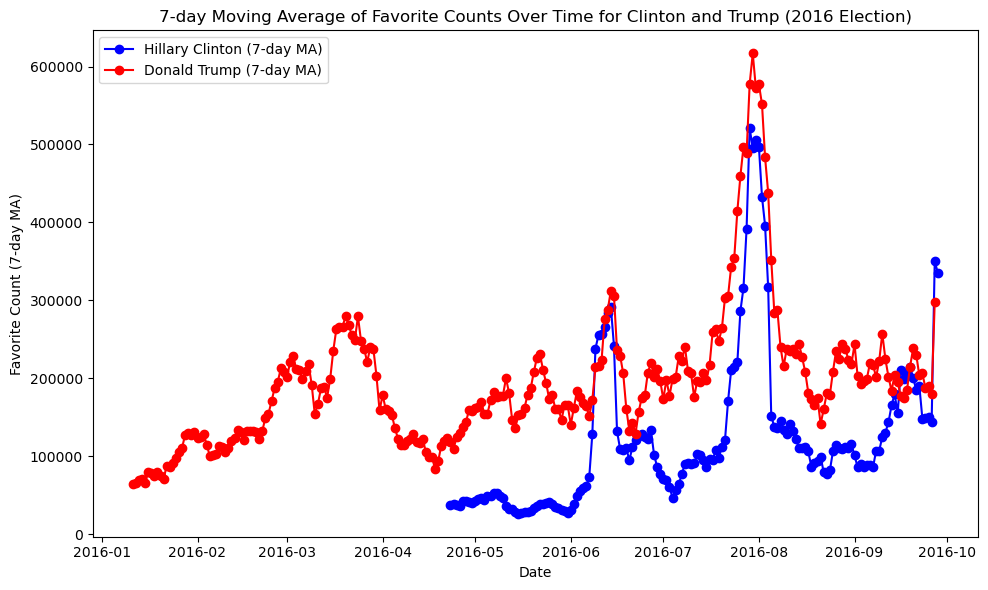

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总点赞量
clinton_daily = clinton_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']
trump_daily = trump_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']

# 计算7天移动平均
clinton_ma7 = clinton_daily.rolling(window=7).mean()
trump_ma7 = trump_daily.rolling(window=7).mean()

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的7天移动平均
plt.plot(clinton_ma7.index, clinton_ma7, label="Hillary Clinton (7-day MA)", color='blue', marker='o', linestyle='-')

# 绘制特朗普的7天移动平均
plt.plot(trump_ma7.index, trump_ma7, label="Donald Trump (7-day MA)", color='red', marker='o', linestyle='-')

# 添加标题和标签
plt.title('7-day Moving Average of Favorite Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Favorite Count (7-day MA)')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()


	1.	移动平均：这里我们使用的是 7 天窗口的移动平均值（window=7），可以平滑掉一些噪声并展示长期趋势。
	2.	可视化风格：不同颜色区分希拉里和特朗普的趋势，并展示了每个时间段内的变化。


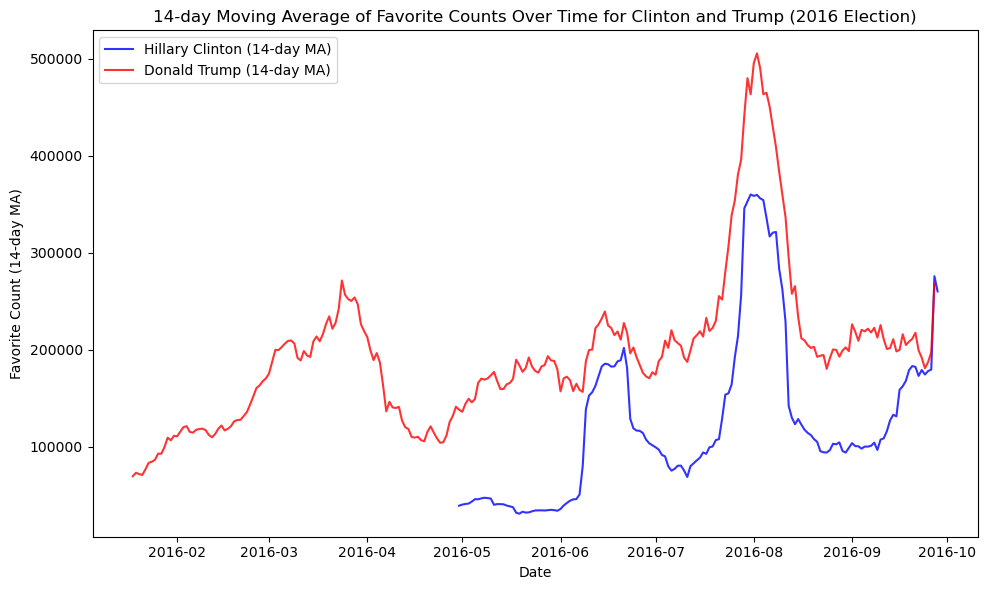

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据


# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总点赞量
clinton_daily = clinton_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']
trump_daily = trump_data.resample('D', on='date').sum(numeric_only=True)['favorite_count']

# 计算14天移动平均
clinton_ma14 = clinton_daily.rolling(window=14).mean()
trump_ma14 = trump_daily.rolling(window=14).mean()

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的14天移动平均
plt.plot(clinton_ma14.index, clinton_ma14, label="Hillary Clinton (14-day MA)", color='blue', linestyle='-', alpha=0.8)

# 绘制特朗普的14天移动平均
plt.plot(trump_ma14.index, trump_ma14, label="Donald Trump (14-day MA)", color='red', linestyle='-', alpha=0.8)

# 添加标题和标签
plt.title('14-day Moving Average of Favorite Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Favorite Count (14-day MA)')
plt.legend()

# 去掉圆点标记，只保留平滑的线条
plt.tight_layout()

# 显示图表
plt.show()

	1.	移动窗口加大到 14 天：进一步平滑数据，减少短期波动的影响。
	2.	去掉数据点的标记：避免视觉上的干扰，使得折线更加清晰。

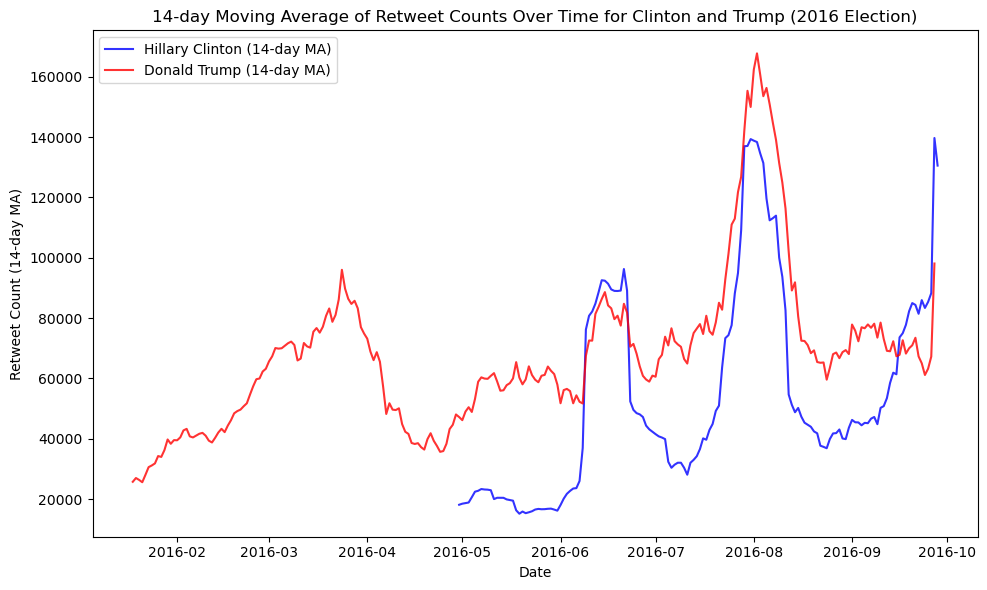

In [12]:

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总转发量
clinton_daily_retweets = clinton_data.resample('D', on='date').sum(numeric_only=True)['retweet_count']
trump_daily_retweets = trump_data.resample('D', on='date').sum(numeric_only=True)['retweet_count']

# 计算14天移动平均
clinton_retweets_ma14 = clinton_daily_retweets.rolling(window=14).mean()
trump_retweets_ma14 = trump_daily_retweets.rolling(window=14).mean()

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的14天移动平均转发量
plt.plot(clinton_retweets_ma14.index, clinton_retweets_ma14, label="Hillary Clinton (14-day MA)", color='blue', linestyle='-', alpha=0.8)

# 绘制特朗普的14天移动平均转发量
plt.plot(trump_retweets_ma14.index, trump_retweets_ma14, label="Donald Trump (14-day MA)", color='red', linestyle='-', alpha=0.8)

# 添加标题和标签
plt.title('14-day Moving Average of Retweet Counts Over Time for Clinton and Trump (2016 Election)')
plt.xlabel('Date')
plt.ylabel('Retweet Count (14-day MA)')
plt.legend()

# 去掉圆点标记，只保留平滑的线条
plt.tight_layout()

# 显示图表
plt.show()

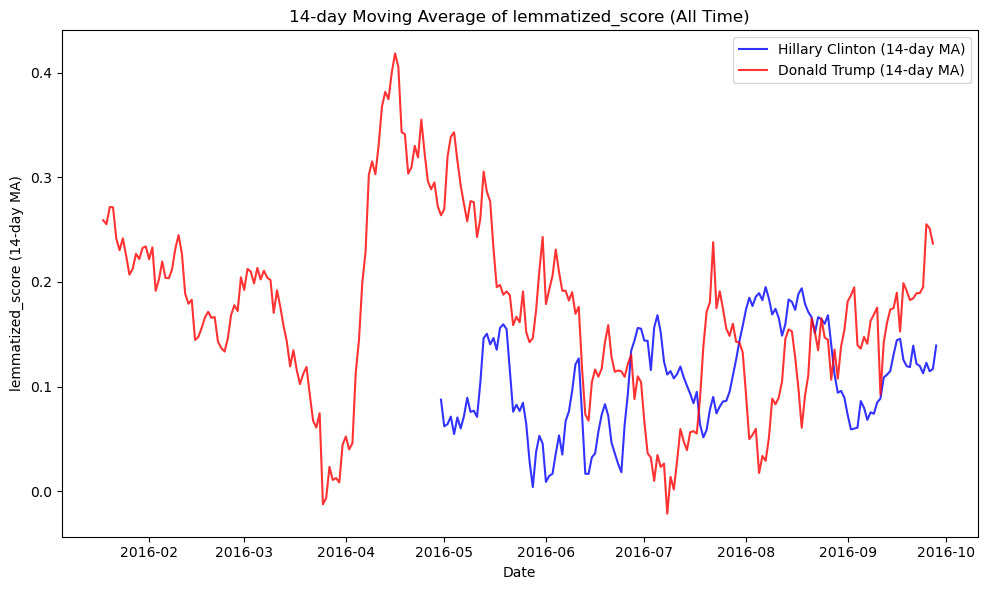

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总情感得分（适用于所有时间的数据）
clinton_daily_sentiment = clinton_data.resample('D', on='date').mean(numeric_only=True)['lemmatized_score']
trump_daily_sentiment = trump_data.resample('D', on='date').mean(numeric_only=True)['lemmatized_score']

# 计算14天移动平均
clinton_sentiment_ma14 = clinton_daily_sentiment.rolling(window=14).mean()
trump_sentiment_ma14 = trump_daily_sentiment.rolling(window=14).mean()

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的14天移动平均情感得分
plt.plot(clinton_sentiment_ma14.index, clinton_sentiment_ma14, label="Hillary Clinton (14-day MA)", color='blue', linestyle='-', alpha=0.8)

# 绘制特朗普的14天移动平均情感得分
plt.plot(trump_sentiment_ma14.index, trump_sentiment_ma14, label="Donald Trump (14-day MA)", color='red', linestyle='-', alpha=0.8)

# 添加标题和标签
plt.title('14-day Moving Average of lemmatized_score (All Time)')
plt.xlabel('Date')
plt.ylabel('lemmatized_score (14-day MA)')
plt.legend()

# 去掉圆点标记，只保留平滑的线条
plt.tight_layout()

# 显示图表
plt.show()

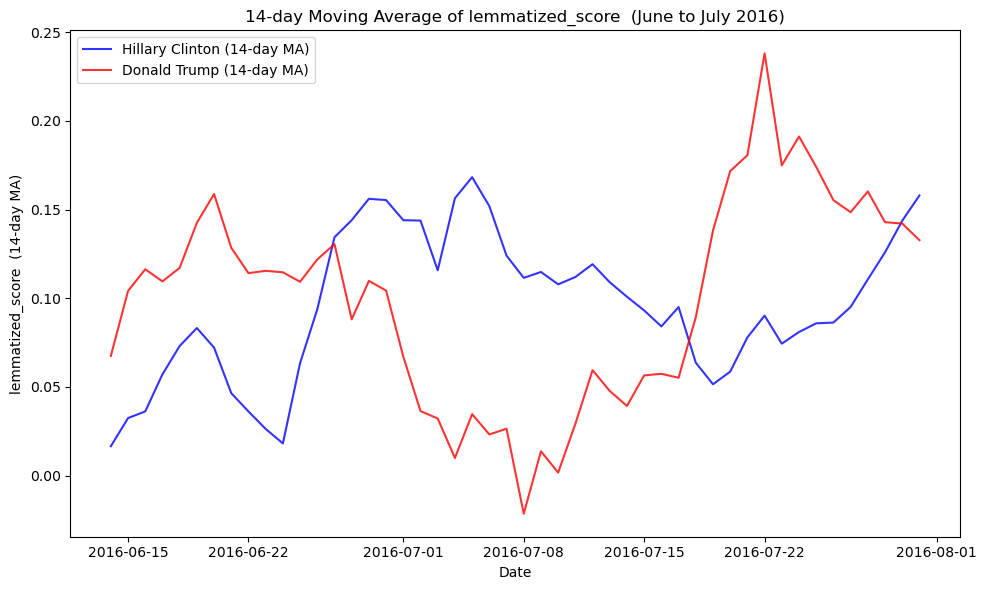

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 提取希拉里和特朗普的推文数据
clinton_data = data_cleaned[data_cleaned['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_cleaned[data_cleaned['handle'].str.contains('Trump', case=False, na=False)]

# 过滤出2016年6月至7月的数据
clinton_data_filtered = clinton_data[(clinton_data['date'] >= '2016-06-01') & (clinton_data['date'] <= '2016-07-31')]
trump_data_filtered = trump_data[(trump_data['date'] >= '2016-06-01') & (trump_data['date'] <= '2016-07-31')]

# 按天汇总情感得分
clinton_daily_sentiment = clinton_data_filtered.resample('D', on='date').mean(numeric_only=True)['lemmatized_score']
trump_daily_sentiment = trump_data_filtered.resample('D', on='date').mean(numeric_only=True)['lemmatized_score']

# 计算14天移动平均
clinton_sentiment_ma14 = clinton_daily_sentiment.rolling(window=14).mean()
trump_sentiment_ma14 = trump_daily_sentiment.rolling(window=14).mean()

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制希拉里的14天移动平均情感得分
plt.plot(clinton_sentiment_ma14.index, clinton_sentiment_ma14, label="Hillary Clinton (14-day MA)", color='blue', linestyle='-', alpha=0.8)

# 绘制特朗普的14天移动平均情感得分
plt.plot(trump_sentiment_ma14.index, trump_sentiment_ma14, label="Donald Trump (14-day MA)", color='red', linestyle='-', alpha=0.8)

# 添加标题和标签
plt.title('14-day Moving Average of lemmatized_score  (June to July 2016)')
plt.xlabel('Date')
plt.ylabel('lemmatized_score  (14-day MA)')
plt.legend()

# 去掉圆点标记，只保留平滑的线条
plt.tight_layout()

# 显示图表
plt.show()


In [24]:
import pandas as pd
import plotly.graph_objects as go

# 读取清理后的数据
data_cleaned = pd.read_csv('new dataset.csv')

# 将日期列转换为 datetime 格式
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# 过滤出2016年6月至7月的数据
data_filtered = data_cleaned[(data_cleaned['date'] >= '2016-06-01') & (data_cleaned['date'] <= '2016-07-31')]

# 提取希拉里和特朗普的推文数据
clinton_data = data_filtered[data_filtered['handle'].str.contains('Clinton', case=False, na=False)]
trump_data = data_filtered[data_filtered['handle'].str.contains('Trump', case=False, na=False)]

# 按天汇总不同情绪的出现次数
clinton_emotions = clinton_data.groupby(['date', 'emotion']).size().unstack(fill_value=0)
trump_emotions = trump_data.groupby(['date', 'emotion']).size().unstack(fill_value=0)

# 创建情绪的雷达图框架
def create_radar_chart(df_clinton, df_trump, date):
    fig = go.Figure()

    # 绘制希拉里的情绪分布雷达图
    fig.add_trace(go.Scatterpolar(
        r=df_clinton.loc[date].values,
        theta=df_clinton.columns,
        fill='toself',
        name='Clinton',
        line_color='blue',
        opacity=0.5,  # 增加透明度
        line=dict(width=3)  # 增加线条粗细
    ))

    # 绘制特朗普的情绪分布雷达图
    fig.add_trace(go.Scatterpolar(
        r=df_trump.loc[date].values,
        theta=df_trump.columns,
        fill='toself',
        name='Trump',
        line_color='red',
        opacity=0.5,  # 增加透明度
        line=dict(width=3)  # 增加线条粗细
    ))

    # 配置雷达图的布局，将最大数值调至15
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 15])  # 调整数值范围
        ),
        showlegend=True,
        title=f'Emotion Distribution for Clinton and Trump on {date}'
    )

    return fig

# 初始化日期列表
dates = sorted(set(clinton_emotions.index) | set(trump_emotions.index))

# 绘制初始雷达图
initial_date = dates[0]
fig = create_radar_chart(clinton_emotions, trump_emotions, initial_date)

# 添加时间滑块
steps = []
for i, date in enumerate(dates):
    step = dict(
        method="animate",
        args=[[date], {
            "frame": {"duration": 500, "redraw": True},
            "mode": "immediate",
            "transition": {"duration": 300}
        }],
        label=str(date.date())
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

# 添加动画帧
frames = [go.Frame(data=go.Scatterpolar(r=clinton_emotions.loc[date].values,
                                        theta=clinton_emotions.columns,
                                        fill='toself', name='Clinton',
                                        line_color='blue', opacity=0.5, line=dict(width=3)),
                   name=str(date)) for date in dates]

frames += [go.Frame(data=go.Scatterpolar(r=trump_emotions.loc[date].values,
                                         theta=trump_emotions.columns,
                                         fill='toself', name='Trump',
                                         line_color='red', opacity=0.5, line=dict(width=3)),
                    name=str(date)) for date in dates]

fig.update(frames=frames)

# 显示图表
fig.show()